# Import Libraries 

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Read Data 

In [140]:
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

In [141]:
client_df.replace({'MISSING':np.NaN , 't' : 1 , 'f' : 0} , inplace = True)

In [142]:
def Information (df) :
        df.replace('?' , np.nan , inplace = True )
        nulls = (df.shape[0] - df.dropna(axis = 0).shape[0])
        nulls_per = (df.shape[0] - df.dropna(axis = 0).shape[0]) / df.shape[0]
        dup , dup_per = df.duplicated().sum() , (df.duplicated().sum()) / df.shape[0]
        numerical_columns = list((df.select_dtypes(include=np.number)).columns)
        categorical_columns = list(df.select_dtypes(include = ['object']).columns)
        numerical_col_dict = {}
        for col in numerical_columns :
            if df[col].nunique() > 10 :
                numerical_col_dict[col] = 'Continuous' 

            else :
                numerical_col_dict[col] = 'Discrete'
        categorical_col_dict = {}
        for col in categorical_columns :
            if df[col].nunique() > 10 :
                categorical_col_dict[col] = 'Continuous' 

            else :
                categorical_col_dict[col] = 'Classes'
        x = []
        for col in df.columns : 
            x.append([col , df[col].unique() ,df[col].nunique(),df[col].dtype,df[col].isna().sum(),int((df[col].isna().sum())/df.shape[0] * 100)  ])

        x = pd.DataFrame(x ,columns=['Feature','Unique_Values','No.OfUniqueValues','DataType','NoOfNulls','Nulls %'])
        
        print('\n','There is : {}  Nulls, Representing {} % of The Data'.format(nulls , '%.2f'%nulls_per ))
        print('\n','There is : {}  Duplicated, Representing {} % of The Data'.format(dup , '%.2f'%dup_per))
        print('\n','Numerical Columns : {}'.format(numerical_col_dict))
        print('\n','Categorical Columns : {}'.format(categorical_col_dict))
        
        return x

In [143]:
Information(client_df)


 There is : 3775  Nulls, Representing 0.26 % of The Data

 There is : 0  Duplicated, Representing 0.00 % of The Data

 Numerical Columns : {'cons_12m': 'Continuous', 'cons_gas_12m': 'Continuous', 'cons_last_month': 'Continuous', 'forecast_cons_12m': 'Continuous', 'forecast_cons_year': 'Continuous', 'forecast_discount_energy': 'Continuous', 'forecast_meter_rent_12m': 'Continuous', 'forecast_price_energy_off_peak': 'Continuous', 'forecast_price_energy_peak': 'Continuous', 'forecast_price_pow_off_peak': 'Continuous', 'has_gas': 'Discrete', 'imp_cons': 'Continuous', 'margin_gross_pow_ele': 'Continuous', 'margin_net_pow_ele': 'Continuous', 'nb_prod_act': 'Discrete', 'net_margin': 'Continuous', 'num_years_antig': 'Continuous', 'pow_max': 'Continuous', 'churn': 'Discrete'}

 Categorical Columns : {'id': 'Continuous', 'channel_sales': 'Classes', 'date_activ': 'Continuous', 'date_end': 'Continuous', 'date_modif_prod': 'Continuous', 'date_renewal': 'Continuous', 'origin_up': 'Classes'}


,Feature,Unique_Values,No.OfUniqueValues,DataType,NoOfNulls,Nulls %
0,id,"[24011ae4ebbe3035111d65fa7c15bc57, d29c2c54acc...",14606,object,0,0
1,channel_sales,"[foosdfpfkusacimwkcsosbicdxkicaua, nan, lmkeba...",7,object,3725,25
2,cons_12m,"[0, 4660, 544, 1584, 4425, 8302, 45097, 29552,...",11065,int64,0,0
3,cons_gas_12m,"[54946, 0, 1542867, 80583, 41883, 188601, 1868...",2112,int64,0,0
4,cons_last_month,"[0, 526, 1998, 1260, 2188, 3112, 2489, 5280, 3...",4751,int64,0,0
5,date_activ,"[2013-06-15, 2009-08-21, 2010-04-16, 2010-03-3...",1796,object,0,0
6,date_end,"[2016-06-15, 2016-08-30, 2016-04-16, 2016-03-3...",368,object,0,0
7,date_modif_prod,"[2015-11-01, 2009-08-21, 2010-04-16, 2010-03-3...",2129,object,0,0
8,date_renewal,"[2015-06-23, 2015-08-31, 2015-04-17, 2015-03-3...",386,object,0,0
9,forecast_cons_12m,"[0.0, 189.95, 47.96, 240.04, 445.75, 796.94, 8...",13993,float64,0,0


# 1. Prepare Client DataFrame

In [144]:
categorical_columns = list(client_df.select_dtypes(include = ['object']).columns)
for col in categorical_columns :
    try :
        client_df[col] = pd.to_datetime(client_df[col], format='%Y-%m-%d')
    except :
        pass 

In [145]:
client_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,NaN,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,1,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


# Working with Date Columns

In [146]:
(client_df['date_activ'] == client_df['date_modif_prod']).value_counts()

False    7334
True     7272
dtype: int64

In [147]:
client_df['start_year'] = client_df['date_activ'].dt.year
client_df['start_month'] = client_df['date_activ'].dt.month

client_df['end_year'] = client_df['date_end'].dt.year
client_df['end_month'] = client_df['date_end'].dt.month

client_df['modif_year'] = client_df['date_modif_prod'].dt.year
client_df['modif_month'] = client_df['date_modif_prod'].dt.month

client_df['renewal_year'] = client_df['date_renewal'].dt.year
client_df['renewal_month'] = client_df['date_renewal'].dt.month

client_df.drop(['date_activ','date_end','date_modif_prod','date_renewal'] ,axis = 1 ,inplace = True )

25% of values in channel sales is null and just 64 value in origin up is null

impute null in origin up with most common value in this column due to few number of null

In [148]:
client_df['origin_up'].fillna(value = client_df['origin_up'].value_counts().index[0] , inplace = True)

dealing with 25% of null values in channel sales 

try to get good pattern to fill null with it

In [149]:
client_df.groupby('origin_up')['channel_sales','has_gas'].value_counts().unstack()

has_gas                                                                 0  \
origin_up                        channel_sales                              
kamkkxfxxuwbdslkwifmmcsiusiuosws ewpakwlliwisiwduibdlfmalxowmwpci   326.0   
                                 fixdbufsefwooaasfcxdxadsiekoceaa     1.0   
                                 foosdfpfkusacimwkcsosbicdxkicaua   818.0   
                                 lmkebamcaaclubfxadlmueccxoimlema   731.0   
                                 sddiedcslfslkckwlfkdpoeeailfpeds     1.0   
                                 usilxuppasemubllopkaafesmlibmsdf   429.0   
ldkssxwpmemidmecebumciepifcamkci epumfxlbckeskwekxbiuasklxalciiuu     1.0   
                                 ewpakwlliwisiwduibdlfmalxowmwpci   242.0   
                                 fixdbufsefwooaasfcxdxadsiekoceaa     NaN   
                                 foosdfpfkusacimwkcsosbicdxkicaua   539.0   
                                 lmkebamcaaclubfxadlmueccxoimlema   441.0   
                                 sddiedcslfslkckwlfkdpoeeailfpeds     9.0   
                                 usilxuppasemubllopkaafesmlibmsdf   109.0   
lxidpiddsbxsbosboudacockeimpuepw epumfxlbckeskwekxbiuasklxalciiuu     2.0   
                                 ewpakwlliwisiwduibdlfmalxowmwpci   165.0   
                                 foosdfpfkusacimwkcsosbicdxkicaua  4299.0   
                                 lmkebamcaaclubfxadlmueccxoimlema   268.0   
                                 sddiedcslfslkckwlfkdpoeeailfpeds     1.0   
                                 usilxuppasemubllopkaafesmlibmsdf   598.0   
usapbepcfoloekilkwsdiboslwaxobdp ewpakwlliwisiwduibdlfmalxowmwpci     1.0   

has_gas                                                                1  
origin_up                        channel_sales                            
kamkkxfxxuwbdslkwifmmcsiusiuosws ewpakwlliwisiwduibdlfmalxowmwpci   68.0  
                                 fixdbufsefwooaasfcxdxadsiekoceaa    NaN  
                                 foosdfpfkusacimwkcsosbicdxkicaua   92.0  
                                 lmkebamcaaclubfxadlmueccxoimlema  197.0  
                                 sddiedcslfslkckwlfkdpoeeailfpeds    NaN  
                                 usilxuppasemubllopkaafesmlibmsdf   85.0  
ldkssxwpmemidmecebumciepifcamkci epumfxlbckeskwekxbiuasklxalciiuu    NaN  
                                 ewpakwlliwisiwduibdlfmalxowmwpci   47.0  
                                 fixdbufsefwooaasfcxdxadsiekoceaa    1.0  
                                 foosdfpfkusacimwkcsosbicdxkicaua  109.0  
                                 lmkebamcaaclubfxadlmueccxoimlema  123.0  
                                 sddiedcslfslkckwlfkdpoeeailfpeds    NaN  
                                 usilxuppasemubllopkaafesmlibmsdf   20.0  
lxidpiddsbxsbosboudacockeimpuepw epumfxlbckeskwekxbiuasklxalciiuu    NaN  
                                 ewpakwlliwisiwduibdlfmalxowmwpci   44.0  
                                 foosdfpfkusacimwkcsosbicdxkicaua  897.0  
                                 lmkebamcaaclubfxadlmueccxoimlema   83.0  
                                 sddiedcslfslkckwlfkdpoeeailfpeds    NaN  
                                 usilxuppasemubllopkaafesmlibmsdf  134.0  
usapbepcfoloekilkwsdiboslwaxobdp ewpakwlliwisiwduibdlfmalxowmwpci    NaN

In [150]:
null_idx = client_df[client_df['channel_sales'].isna()].index.to_list()
for idx in null_idx:
    if client_df.at[idx , 'origin_up'] == 'usapbepcfoloekilkwsdiboslwaxobdp' :
        client_df.at[idx , 'channel_sales'] = 'ewpakwlliwisiwduibdlfmalxowmwpci'
        
    elif (client_df.at[idx , 'origin_up'] == 'lxidpiddsbxsbosboudacockeimpuepw') :
        client_df.at[idx , 'channel_sales'] = 'foosdfpfkusacimwkcsosbicdxkicaua'
        
    elif (client_df.at[idx , 'origin_up'] == 'ldkssxwpmemidmecebumciepifcamkci') and (client_df.at[idx , 'has_gas'] == 1) :
        client_df.at[idx , 'channel_sales'] = 'lmkebamcaaclubfxadlmueccxoimlema'

    elif (client_df.at[idx , 'origin_up'] == 'ldkssxwpmemidmecebumciepifcamkci') and (client_df.at[idx , 'has_gas'] == 0) :
        client_df.at[idx , 'channel_sales'] = 'foosdfpfkusacimwkcsosbicdxkicaua'
        
    elif (client_df.at[idx , 'origin_up'] == 'kamkkxfxxuwbdslkwifmmcsiusiuosws') and (client_df.at[idx , 'has_gas'] == 1) :
        client_df.at[idx , 'channel_sales'] = 'lmkebamcaaclubfxadlmueccxoimlema'
        
    elif (client_df.at[idx , 'origin_up'] == 'kamkkxfxxuwbdslkwifmmcsiusiuosws') and (client_df.at[idx , 'has_gas'] == 0) :
        client_df.at[idx , 'channel_sales'] = 'foosdfpfkusacimwkcsosbicdxkicaua'


In [151]:
Information(client_df)


 There is : 1  Nulls, Representing 0.00 % of The Data

 There is : 0  Duplicated, Representing 0.00 % of The Data

 Numerical Columns : {'cons_12m': 'Continuous', 'cons_gas_12m': 'Continuous', 'cons_last_month': 'Continuous', 'forecast_cons_12m': 'Continuous', 'forecast_cons_year': 'Continuous', 'forecast_discount_energy': 'Continuous', 'forecast_meter_rent_12m': 'Continuous', 'forecast_price_energy_off_peak': 'Continuous', 'forecast_price_energy_peak': 'Continuous', 'forecast_price_pow_off_peak': 'Continuous', 'has_gas': 'Discrete', 'imp_cons': 'Continuous', 'margin_gross_pow_ele': 'Continuous', 'margin_net_pow_ele': 'Continuous', 'nb_prod_act': 'Discrete', 'net_margin': 'Continuous', 'num_years_antig': 'Continuous', 'pow_max': 'Continuous', 'churn': 'Discrete', 'start_year': 'Continuous', 'start_month': 'Continuous', 'end_year': 'Discrete', 'end_month': 'Continuous', 'modif_year': 'Continuous', 'modif_month': 'Continuous', 'renewal_year': 'Discrete', 'renewal_month': 'Continuous'}



,Feature,Unique_Values,No.OfUniqueValues,DataType,NoOfNulls,Nulls %
0,id,"[24011ae4ebbe3035111d65fa7c15bc57, d29c2c54acc...",14606,object,0,0
1,channel_sales,"[foosdfpfkusacimwkcsosbicdxkicaua, lmkebamcaac...",7,object,1,0
2,cons_12m,"[0, 4660, 544, 1584, 4425, 8302, 45097, 29552,...",11065,int64,0,0
3,cons_gas_12m,"[54946, 0, 1542867, 80583, 41883, 188601, 1868...",2112,int64,0,0
4,cons_last_month,"[0, 526, 1998, 1260, 2188, 3112, 2489, 5280, 3...",4751,int64,0,0
5,forecast_cons_12m,"[0.0, 189.95, 47.96, 240.04, 445.75, 796.94, 8...",13993,float64,0,0
6,forecast_cons_year,"[0, 526, 1998, 751, 2188, 3112, 2489, 5280, 10...",4218,int64,0,0
7,forecast_discount_energy,"[0.0, 30.0, 24.0, 28.0, 26.0, 22.0, 10.0, 5.0,...",12,float64,0,0
8,forecast_meter_rent_12m,"[1.78, 16.27, 38.72, 19.83, 131.73, 30.12, 0.0...",3528,float64,0,0
9,forecast_price_energy_off_peak,"[0.114481, 0.1457109999999999, 0.165794, 0.146...",516,float64,0,0


In [152]:
client_df['channel_sales'].fillna(value = client_df['channel_sales'].value_counts().index[0] , inplace = True)

ther's another way to fillna in channel sales with value "other"

Encoder Categorical column in client dataframe

In [153]:
dummies = pd.get_dummies(client_df[['channel_sales','origin_up']] , drop_first=True)
client_df.drop(['channel_sales','origin_up'] , axis = 1 ,inplace=True)
client_df = client_df.join(dummies)

In [154]:
client_df

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,0,0,1,0,0,0,0,0,1,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,0,0,1,0,0,0,1,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,0,0,1,0,0,0,1,0,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,0,0,0,1,0,0,1,0,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,32270,47940,0,4648.01,0,0.0,18.57,0.138305,0.000000,...,0,0,1,0,0,0,0,0,1,0
14602,d0a6f71671571ed83b2645d23af6de00,7223,0,181,631.69,181,0.0,144.03,0.100167,0.091892,...,0,0,1,0,0,0,0,0,1,0
14603,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,190.39,179,0.0,129.60,0.116900,0.100015,...,0,0,1,0,0,0,0,0,1,0
14604,1cf20fd6206d7678d5bcafd28c53b4db,131,0,0,19.34,0,0.0,7.18,0.145711,0.000000,...,0,0,1,0,0,0,0,0,1,0


# 2. Prepare Price DataFrame

In [155]:
price_df

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [156]:
price_df[price_df['id'] == '16f51cdc2baa19af0b940ee1b3dd17d5']

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
192990,16f51cdc2baa19af0b940ee1b3dd17d5,2015-01-01,0.129444,0.106863,0.075004,40.565969,24.339581,16.226389
192991,16f51cdc2baa19af0b940ee1b3dd17d5,2015-02-01,0.129444,0.106863,0.075004,40.565969,24.339581,16.226389
192992,16f51cdc2baa19af0b940ee1b3dd17d5,2015-03-01,0.129444,0.106863,0.075004,40.565969,24.339581,16.226389
192993,16f51cdc2baa19af0b940ee1b3dd17d5,2015-04-01,0.129444,0.106863,0.075004,40.565969,24.339581,16.226389
192994,16f51cdc2baa19af0b940ee1b3dd17d5,2015-05-01,0.129444,0.106863,0.075004,40.565973,24.339578,16.226383
192995,16f51cdc2baa19af0b940ee1b3dd17d5,2015-06-01,0.129444,0.106863,0.075004,40.565973,24.339578,16.226383
192996,16f51cdc2baa19af0b940ee1b3dd17d5,2015-07-01,0.128077,0.106401,0.076311,40.728885,24.437330,16.291555
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.437330,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.437330,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.437330,16.291555


In [157]:
price_df.groupby('id')[price_df.columns[2:]].mean()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...
ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569


In [158]:
price_df = price_df.groupby('id')[price_df.columns[2:]].mean()
price_df = price_df.reset_index()
price_df

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678


In [159]:
df = pd.merge(client_df , price_df , on = 'id')
df

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,0,0,1,0,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,1,0,0,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,1,0,0,0,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,1,0,0,0,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,1,0,0,0,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,32270,47940,0,4648.01,0,0.0,18.57,0.138305,0.000000,...,0,0,1,0,0.144124,0.000000,0.000000,44.370635,0.000000,0.000000
14602,d0a6f71671571ed83b2645d23af6de00,7223,0,181,631.69,181,0.0,144.03,0.100167,0.091892,...,0,0,1,0,0.106799,0.095406,0.070817,59.015674,36.393379,8.345418
14603,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,190.39,179,0.0,129.60,0.116900,0.100015,...,0,0,1,0,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
14604,1cf20fd6206d7678d5bcafd28c53b4db,131,0,0,19.34,0,0.0,7.18,0.145711,0.000000,...,0,0,1,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000


# Modify Memory Usage

In [160]:
def Modify_Memory (df):
    from math import exp, log
    df_copy = df.copy(deep = True)
    numerical_columns = list((df_copy.select_dtypes(include=np.number)).columns)
    
    for col in numerical_columns :
        a=round(log(df_copy[col].max() , 2))
        if df_copy[col].dtypes == float :
            if (a >= 16) and (a < 32) :
                df_copy[col] = df_copy[col].astype(np.float32)
            else :
                df_copy[col] = df_copy[col].astype(np.float16)
        else :
            if a >= 16 :
                df_copy[col] = df_copy[col].astype(np.int32)
            elif (a < 16) and (a > 8) :
                df_copy[col] = df_copy[col].astype(np.int16)
            else :
                df_copy[col] = df_copy[col].astype(np.int8)
    return df_copy

In [161]:
df_copy = Modify_Memory(df)

In [166]:
Information(df_copy)


 There is : 0  Nulls, Representing 0.00 % of The Data

 There is : 0  Duplicated, Representing 0.00 % of The Data

 Numerical Columns : {'cons_12m': 'Continuous', 'cons_gas_12m': 'Continuous', 'cons_last_month': 'Continuous', 'forecast_cons_12m': 'Continuous', 'forecast_cons_year': 'Continuous', 'forecast_discount_energy': 'Continuous', 'forecast_meter_rent_12m': 'Continuous', 'forecast_price_energy_off_peak': 'Continuous', 'forecast_price_energy_peak': 'Continuous', 'forecast_price_pow_off_peak': 'Continuous', 'has_gas': 'Discrete', 'imp_cons': 'Continuous', 'margin_gross_pow_ele': 'Continuous', 'margin_net_pow_ele': 'Continuous', 'nb_prod_act': 'Discrete', 'net_margin': 'Continuous', 'num_years_antig': 'Continuous', 'pow_max': 'Continuous', 'churn': 'Discrete', 'start_year': 'Continuous', 'start_month': 'Continuous', 'end_year': 'Discrete', 'end_month': 'Continuous', 'modif_year': 'Continuous', 'modif_month': 'Continuous', 'renewal_year': 'Discrete', 'renewal_month': 'Continuous', '

,Feature,Unique_Values,No.OfUniqueValues,DataType,NoOfNulls,Nulls %
0,id,"[24011ae4ebbe3035111d65fa7c15bc57, d29c2c54acc...",14606,object,0,0
1,cons_12m,"[0, 4660, 544, 1584, 4425, 8302, 45097, 29552,...",11065,int32,0,0
2,cons_gas_12m,"[54946, 0, 1542867, 80583, 41883, 188601, 1868...",2112,int32,0,0
3,cons_last_month,"[0, 526, 1998, 1260, 2188, 3112, 2489, 5280, 3...",4751,int32,0,0
4,forecast_cons_12m,"[0.0, 189.95, 47.96, 240.04, 445.75, 796.94, 8...",13993,float32,0,0
5,forecast_cons_year,"[0, 526, 1998, 751, 2188, 3112, 2489, 5280, 10...",4218,int32,0,0
6,forecast_discount_energy,"[0.0, 30.0, 24.0, 28.0, 26.0, 22.0, 10.0, 5.0,...",12,float16,0,0
7,forecast_meter_rent_12m,"[1.78, 16.27, 38.72, 19.83, 131.8, 30.12, 0.0,...",2223,float16,0,0
8,forecast_price_energy_off_peak,"[0.1145, 0.1458, 0.1658, 0.1467, 0.1169, 0.164...",285,float16,0,0
9,forecast_price_energy_peak,"[0.09814, 0.0, 0.0879, 0.10004, 0.0861, 0.0875...",194,float16,0,0


# 3. Modeling and Evaluation

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x = df_copy.drop(['churn','id'] , axis = 1)
y = df_copy['churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Vanilla Model

In [176]:
model = RandomForestClassifier(n_estimators=500,n_jobs=-1)
model.fit(x_train , y_train)
model.score(x_train , y_train) , model.score(x_test , y_test)

(1.0, 0.9057507987220448)

try to solve Overfitting

Feature Importance

In [177]:
features = {'Features' :model.feature_names_in_ , 'Features Importance':model.feature_importances_ }
features = pd.DataFrame(features)

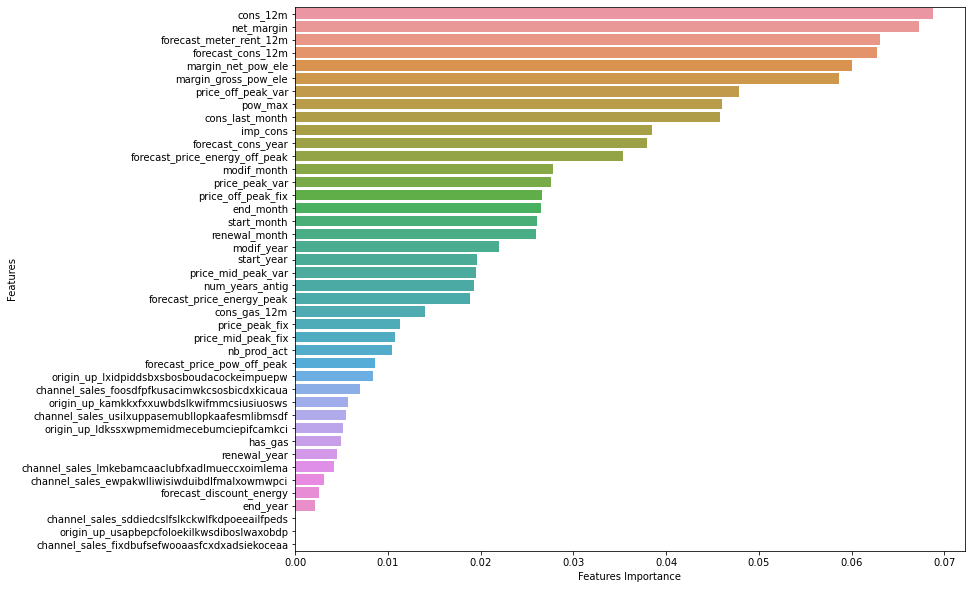

In [178]:
fig = plt.figure(figsize=(12,10))
ax = sns.barplot(data=features.sort_values(by=['Features Importance'], ascending=False), y='Features', x='Features Importance')

In [179]:
_ , features = zip(*sorted(zip(model.feature_importances_ , model.feature_names_in_),reverse=True))
*features_to_use, = features

In [188]:
x = df[features_to_use[:40]]
y = df['churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [189]:
model = RandomForestClassifier(n_estimators=500,n_jobs=-1 , max_depth=15 , min_samples_leaf=3 , min_samples_split=6)
model.fit(x_train , y_train)
model.score(x_train , y_train) , model.score(x_test , y_test)

(0.9241001564945227, 0.9041533546325878)

Try to evaluate model with other matrix

In [190]:
from sklearn.metrics import classification_report
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

train_report = classification_report(y_train , y_train_pred)
test_report = classification_report(y_test , y_test_pred)

print('Train Report', '\n', train_report)
print('Test Report', '\n', test_report)


Train Report 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      9245
           1       1.00      0.21      0.34       979

    accuracy                           0.92     10224
   macro avg       0.96      0.60      0.65     10224
weighted avg       0.93      0.92      0.90     10224

Test Report 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      3942
           1       0.92      0.05      0.09       440

    accuracy                           0.90      4382
   macro avg       0.91      0.52      0.52      4382
weighted avg       0.91      0.90      0.86      4382



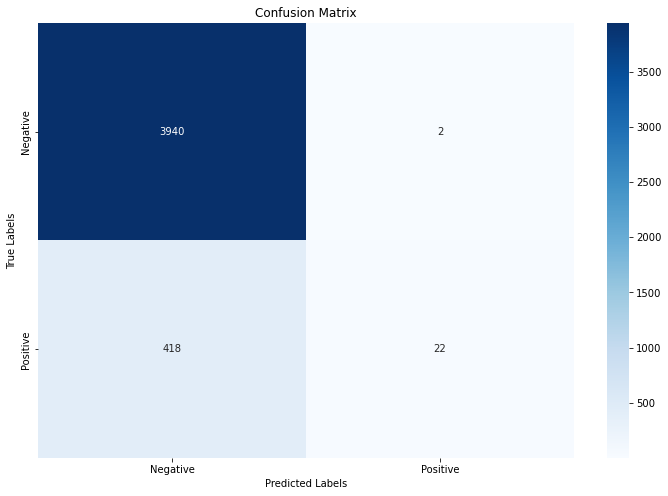

In [191]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(12,8))

conf_matrix = confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='g')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

labels = ['Negative', 'Positive']
plt.xticks(np.arange(len(labels))+0.5, labels)
plt.yticks(np.arange(len(labels))+0.5, labels)

plt.show()


Based on the results above, we can see the performance is very bad. Although the accuracy is up to 90%, it is misleading and pointless, as we only focus on correctly predicting the positive class rather than the nagetive class. The model can only find out 5% of real positive samples. 

# try to make model more sensitive to positive class
## by adapting threshold


In [207]:
y_train_pred = model.predict_proba(x_train)
y_test_pred = model.predict_proba(x_test)

In [208]:
y_train_pred

array([[0.91568925, 0.08431075],
       [0.95168196, 0.04831804],
       [0.98547998, 0.01452002],
       ...,
       [0.96796145, 0.03203855],
       [0.91765539, 0.08234461],
       [0.9489133 , 0.0510867 ]])

In [209]:
train_propa , test_propa = [] , []
for pred in y_train_pred:
    if pred[1] > 0.3 :
        train_propa.append(1)
    else :
        train_propa.append(0)
        
for pred in y_test_pred:
    if pred[1] > 0.3 :
        test_propa.append(1)
    else :
        test_propa.append(0) 

    

In [211]:
from sklearn.metrics import classification_report

train_report = classification_report(y_train , train_propa)
test_report = classification_report(y_test , test_propa)

print('Train Report', '\n', train_report)
print('Test Report', '\n', test_report)


Train Report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      9245
           1       0.99      0.72      0.83       979

    accuracy                           0.97     10224
   macro avg       0.98      0.86      0.91     10224
weighted avg       0.97      0.97      0.97     10224

Test Report 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      3942
           1       0.60      0.15      0.24       440

    accuracy                           0.90      4382
   macro avg       0.76      0.57      0.60      4382
weighted avg       0.88      0.90      0.88      4382



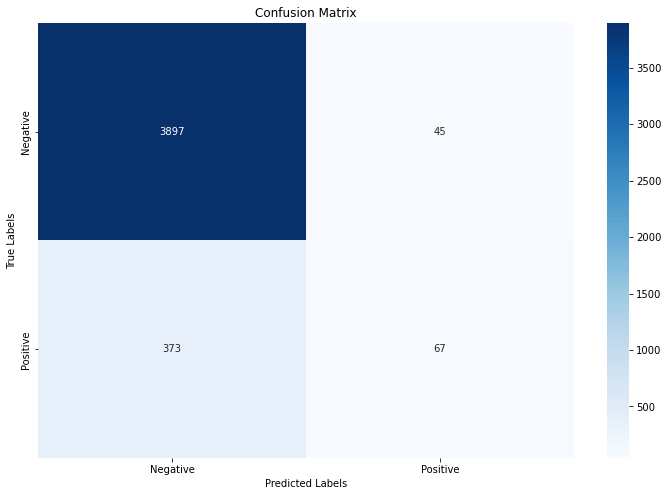

In [212]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(12,8))

conf_matrix = confusion_matrix(y_test, test_propa)

sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='g')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

labels = ['Negative', 'Positive']
plt.xticks(np.arange(len(labels))+0.5, labels)
plt.yticks(np.arange(len(labels))+0.5, labels)

plt.show()


Recall of postive 15% but it's Small change 